In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_excel("data/LoanConsider.xlsx")
dataset.head()

,รายได้ต่อเดือน,สถานะเครดิตบูโร,อายุ,ยอดเงินกู้,ผลอนุมัติเงินกู้
0,20000,ปกติ,25,1000000,อนุมัติ
1,55000,ปิดบัญชีไม่มีหนี้ค้าง,45,2000000,อนุมัติ
2,18000,พักชำระหนี้,25,850000,ไม่อนุมัติ
3,22000,มีหนี้ค้างชำระเกิน 90 วัน,27,1220000,ไม่อนุมัติ
4,18500,อยู่ในกระบวนการทางกฏหมาย,25,870000,ไม่อนุมัติ


In [3]:
dataset.shape

(120, 5)

In [4]:
dataset["สถานะเครดิตบูโร"] = dataset["สถานะเครดิตบูโร"].map(
                       {"ปกติ": 1,
                       "ปิดบัญชีไม่มีหนี้ค้าง": 1,
                       "พักชำระหนี้": 2,
                       "มีหนี้ค้างชำระเกิน 90 วัน": 2,
                       "อยู่ในกระบวนการทางกฏหมาย": 2,
                       "อยู่ในระหว่างชำระหนี้ตามคำพิพากษาตามยอม": 2,
                       "ศาลพิพากษายกฟ้อง เพราะคดีขาดอายุความ": 2,
                       "ปิดบัญชีตัดหนี้เป็นสูญ": 2,
                       "อยู่ระหว่างชำระสินเชื่อเพื่อปิดบัญชี": 1,
                       "เจ้าของบัญชีขอตรวจสอบรายการ": 2,
                       "โอนหรือขายหนี้": 1,
                       "ปิดบัญชีขณะโอนหรือขายหนี้": 1})

In [ ]:
dataset["Approve result"] = dataset["ผลอนุมัติเงินกู้"].map({"อนุมัติ": 1, "ไม่อนุมัติ": 0})

In [5]:
# set up columns "ผลอนุมัติเงินกู้"

dataset["ผลอนุมัติเงินกู้"] = dataset["ผลอนุมัติเงินกู้"].map({"อนุมัติ": 1, "ไม่อนุมัติ": 0})

* Train and Test Model

In [6]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=6)

model_svc = svm.SVC(kernel="rbf")
classifier = model_svc.fit(X_train, y_train.values.ravel())

ypred_test = model_svc.predict(X_test)
acc = format(accuracy_score(y_test, ypred_test), "0.2%")

labels = ["Not Approve","Approve"]
data = [[48000,2,25,500000],[35000,1,25,1700000]]
predict_result = model_svc.predict(data)
plt.show()

In [9]:
i = 0
for result in predict_result:
    print(data[i]," : ", labels[result])
    i = i+1

print("Model performance : ", acc)

[48000, 2, 25, 500000]  :  Not Approve
[35000, 1, 25, 1700000]  :  Approve
Model  :  66.67%


[[17  9]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.44      0.70      0.54        10

    accuracy                           0.67        36
   macro avg       0.64      0.68      0.64        36
weighted avg       0.74      0.67      0.68        36



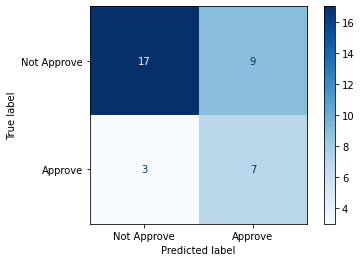

In [8]:
# plot confusion matrix

disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
print(classification_report(y_test,ypred_test))
plt.show()